## Import all necessary packages

In [9]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import datetime
import matplotlib.pyplot as plt


In [11]:
### Import the functions to load the calibration files and the 
from load_data import load_cal_files
from load_data import missing_datetime_2005_05 as mdt

### Define all directories of the calibration data

In [15]:
basepath = '/Users/tillmoritz/Desktop/Work/WBTSData/'

In [21]:
## create a list of all the paths in basepath and check if they contain the folder CTD
## if they do, add them to the list of paths to be loaded
dir_list = []
for root, dirs,files in os.walk(basepath):
    if 'CTD' in dirs: 
        dir_list.append(os.path.join(root, 'CTD'))
dir_list.sort()

### load and safe the complete dataset and the individual datasets for each year

In [23]:
ds_all = load_cal_files.create_complete_Dataset(dir_list)

/Users/tillmoritz/Desktop/Work/WBTSData/GC_2001_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2002_06/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2003_02/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2004_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2005_05/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2005_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2006_03/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2006_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2007_03/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2007_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2008_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2008_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2009_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2009_11/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2010_03/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2011_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2012_02/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2012_09/CTD
/Users/til

In [4]:
safe_path = '/Users/tillmoritz/Desktop/Work/Created_files/CTD'

In [9]:
### save the complete dataset
file_name = 'all_data.nc'
ds_all.to_netcdf(safe_path + '/' + file_name)

In [23]:
### save the data for each individual year
for i in dir_list:
    ds = load_cal_files.create_Dataset(i)
    file_name = i[-11:-4] + '_data.nc'
    ds.to_netcdf(safe_path + '/' + file_name)

/Users/tillmoritz/Desktop/Work/WBTSData/GC_2001_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2002_06/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2003_02/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2004_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2005_05/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2005_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2006_03/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2006_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2007_03/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2007_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2008_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2008_09/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2009_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2009_11/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2010_03/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2011_04/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2012_02/CTD
/Users/tillmoritz/Desktop/Work/WBTSData/GC_2012_09/CTD
/Users/til

In [5]:
### load all data from the netcdf file
file_name = 'all_data.nc'
#file_name = '2023_02_data.nc'
ds_load = xr.open_dataset(safe_path + '/' + file_name)

In [6]:
ds_load

<xarray.Dataset> Size: 405MB
Dimensions:      (Pres: 5828, Datetime: 1448)
Coordinates:
  * Pres         (Pres) float64 47kB 1.0 2.0 3.0 ... 5.827e+03 5.828e+03
  * Datetime     (Datetime) datetime64[ns] 12kB 2001-04-26T17:06:00 ... 2023-...
    Cast         (Datetime) float64 12kB ...
    Lat          (Datetime) float64 12kB ...
    Lon          (Datetime) float64 12kB ...
Data variables:
    Temp         (Pres, Datetime) float64 68MB ...
    Pot. Temp    (Pres, Datetime) float64 68MB ...
    PSAL         (Pres, Datetime) float64 68MB ...
    Dyn. Height  (Pres, Datetime) float64 68MB ...
    ga           (Pres, Datetime) float64 68MB ...
    Dis. Oxygen  (Pres, Datetime) float64 68MB ...

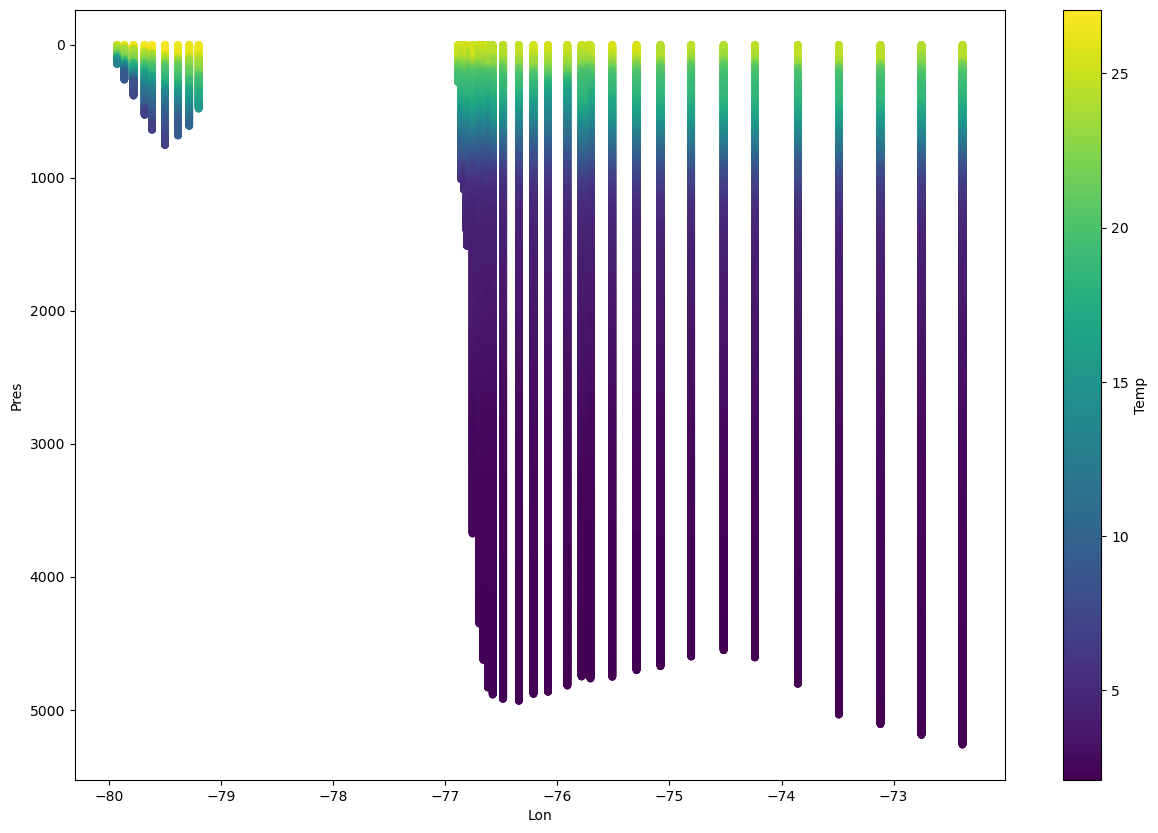

In [27]:
### plot the data with inverted axis
plt.figure(figsize=(15,10))
ds_load.plot.scatter(x='Lon', y='Pres', hue='Temp', s=20, cmap='viridis', edgecolor='face')
plt.gca().invert_yaxis()
plt.show()

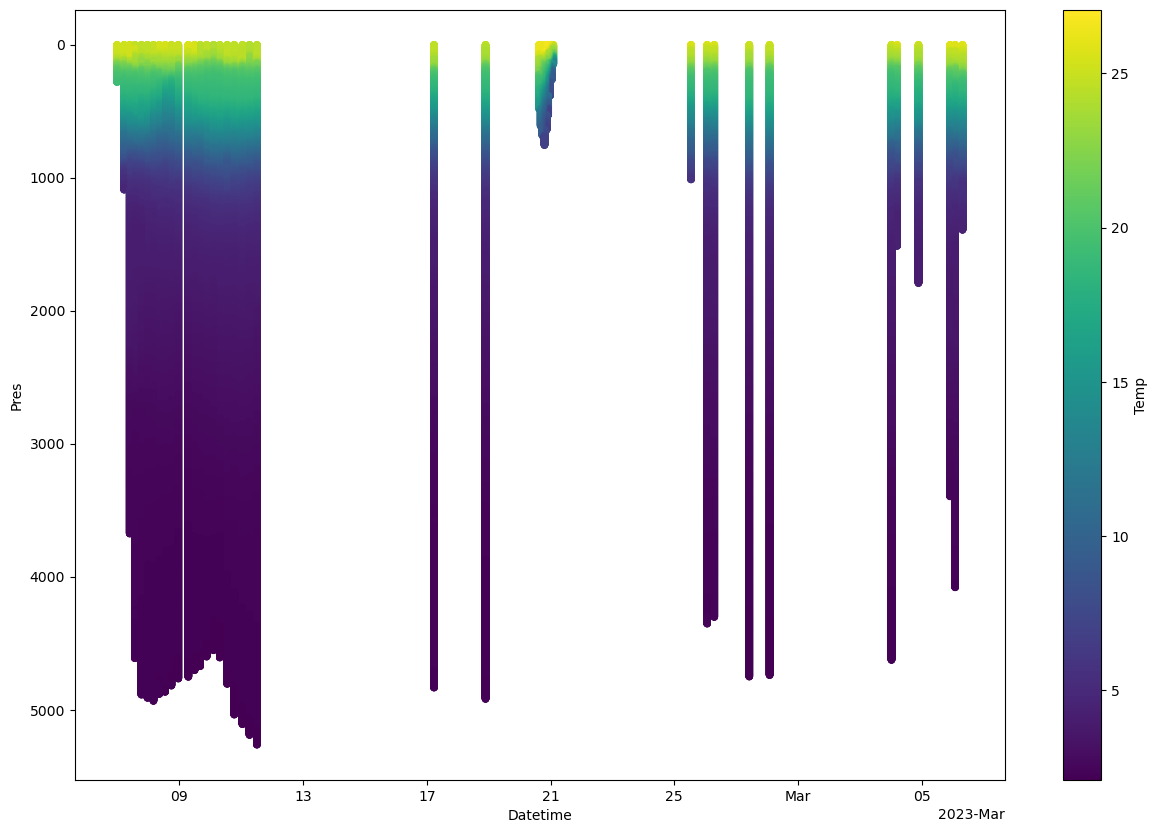

In [28]:
### plot the data with inverted axis
plt.figure(figsize=(15,10))
ds_load.plot.scatter(x='Datetime', y='Pres', hue='Temp', s=20, cmap='viridis', edgecolor='face')
plt.gca().invert_yaxis()
plt.show()